# Kmeans

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [185]:
data = pd.read_csv("dados_tratados.csv", sep='\t', encoding='utf-8')

In [186]:
data = data.drop('Unnamed: 0', axis=1)

In [187]:
scaler = StandardScaler()
dataScaled = scaler.fit_transform(data)

#### Determinação do Número Ótimo de Clusters

In [188]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

##### Cotovelo

c:\Users\luiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\luiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


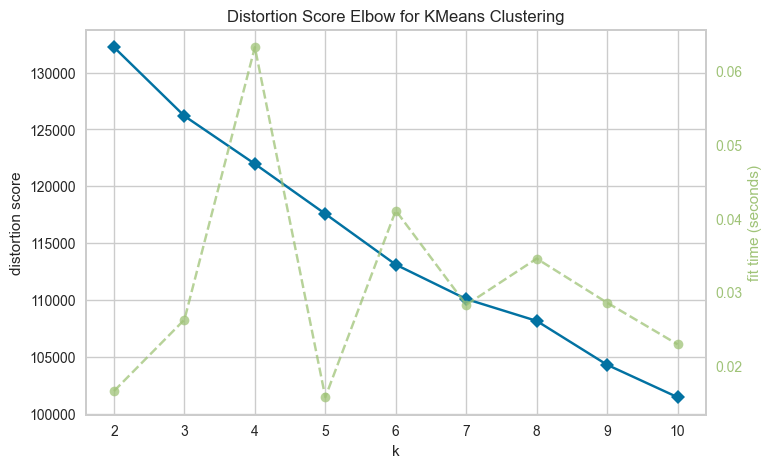

In [189]:
plt.figure(figsize=(8, 5))
visualizer1 = KElbowVisualizer(KMeans(random_state=42), k=(2, 11), metric='distortion')

visualizer1.fit(dataScaled)
visualizer1.ax.set_title('Método do Cotovelo (Distorção)', y=1.05)  

visualizer1.finalize()
plt.show()

##### Silhueta

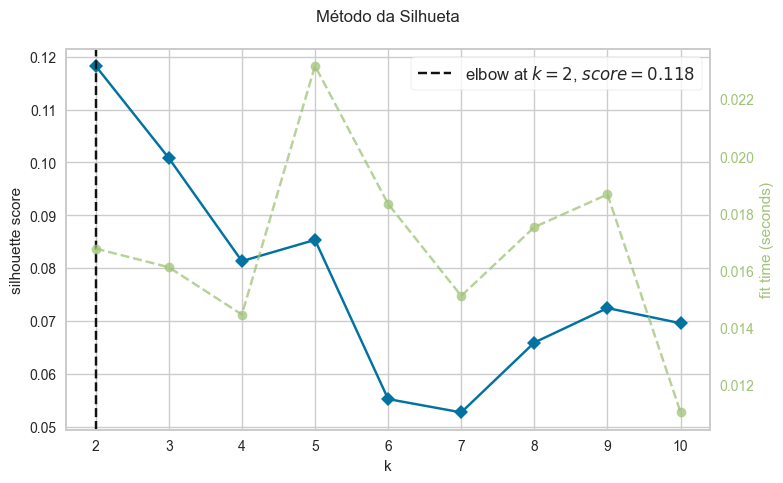

In [190]:
plt.figure(figsize=(8, 5))
visualizer2 = KElbowVisualizer(KMeans(random_state=42), k=(2, 11), metric='silhouette')

visualizer2.fit(dataScaled)
visualizer2.finalize()
visualizer2.ax.set_title('Método da Silhueta', y=1.05)  


visualizer1.finalize()
plt.tight_layout()
plt.show()

##### Índice Calinski-Harabasz

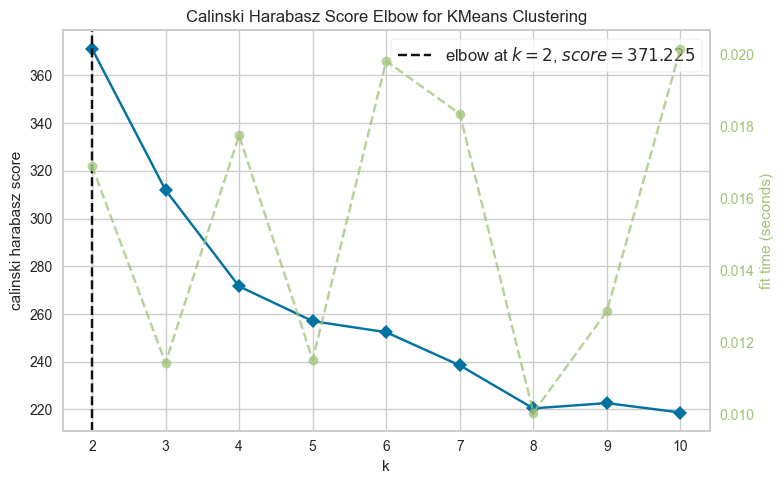

In [191]:
plt.figure(figsize=(8, 5))

visualizer3 = KElbowVisualizer(KMeans(random_state=42), k=(2, 11), metric='calinski_harabasz')
visualizer3.fit(dataScaled)
visualizer3.ax.set_title('Método da Silhueta', y=1.05)  

visualizer3.finalize()
plt.tight_layout()
plt.show()

In [192]:
kmeans = KMeans(n_clusters = 2, random_state = 42, n_init = 10)
kmeans.fit(dataScaled)

data['cluster'] = kmeans.labels_

In [193]:
pca = PCA(n_components=2)
dataPca = pca.fit_transform(dataScaled)

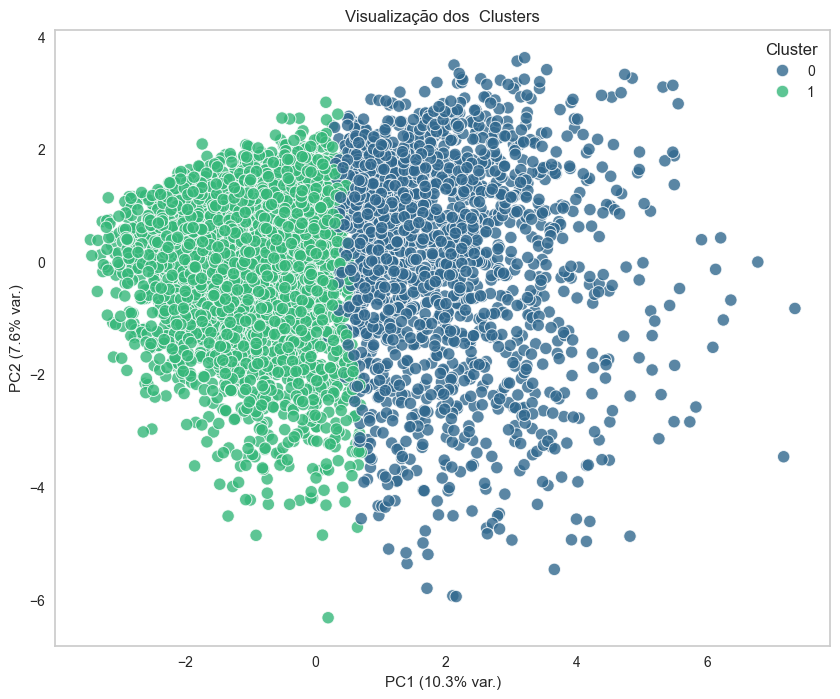

In [194]:
plotData = pd.DataFrame(dataPca, columns=['PC1', 'PC2'])
plotData['cluster'] = data['cluster']


plt.figure(figsize=(10, 8))
sns.scatterplot(data=plotData, x='PC1', y='PC2', hue='cluster', 
                palette='viridis', alpha=0.8, s=80)
plt.title(f'Visualização dos  Clusters')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var.)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var.)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

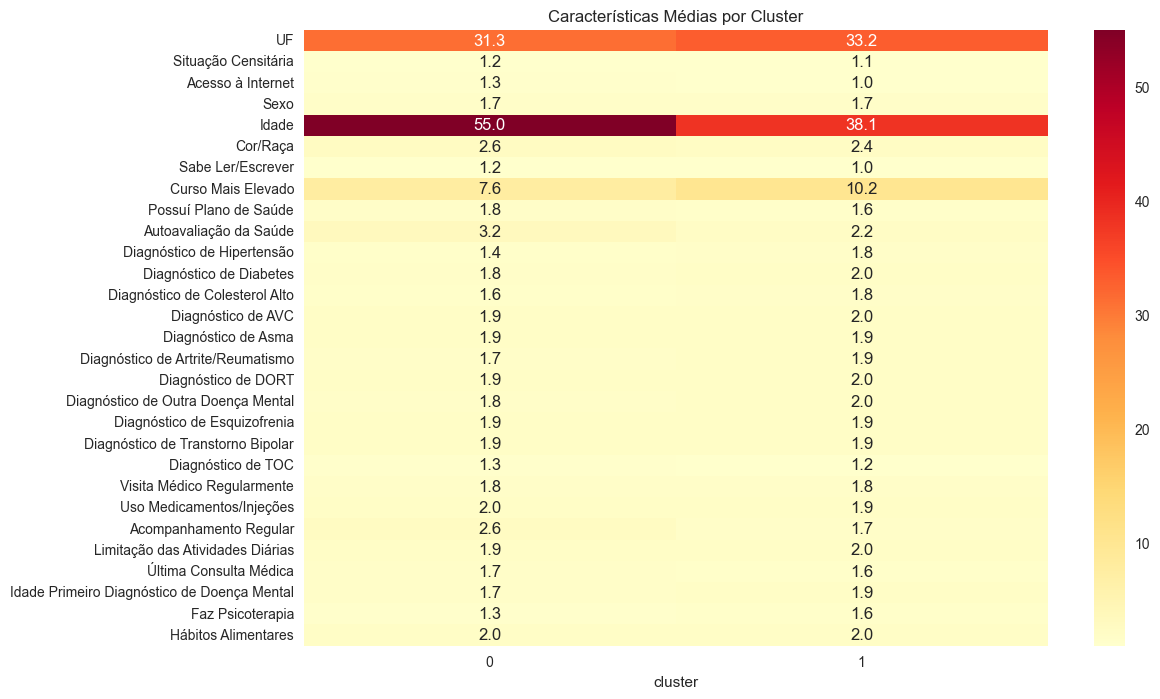

In [195]:
cluster_stats = data.groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_stats.T, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Características Médias por Cluster')
plt.show()

#### Validação do modelo

In [196]:
from sklearn.metrics import silhouette_score

In [197]:
silhouette_avg = silhouette_score(dataScaled, kmeans.labels_)
print(f"Silhouette Score médio: {silhouette_avg:.3f}")


Silhouette Score médio: 0.118
